# Accessing OOI Data Reference Guide
*Written by Sage Lichtenwalner, Rutgers University, May 30, 2019*

The notebook was developed for the June 2019 OOI Ocean Data Labs Workshop

## Introduction
In this Python notebook, we will demonstrate how to access and work with data from the Ocean Observatories Initiative (OOI). This example was designed to run on Google's Colaboratory platform, though it should also work on any Jupyter notebook platform, assuming the required libraries are installed.  

In this notebook, we will demonstrate the following steps:
1.  Discovering OOI Data
2.  Requesting OOI Data
3.  Loading Data
4. Exporting Data for use in other Tools/Software
5. Quick Plots
6. Basic Statistics and Analysis

## 1. Discovering OOI Data to Use

There are a number of ways to discover data from the OOI. Obviously, if you've seen data used in a paper, or we're told about an interesting dataset from a colleague, those are good places to start.  You can also browse the instrument lists available on: 

* the main [OOI Website](https://oceanobservatories.org/research-arrays/), 
* the [OOI Data Portal](https://ooinet.oceanobservatories.org), 
* or the [OOI Data Review Portal](https://ooi-visualocean.whoi.edu).

The latter two sites provide coverage information so you can see what data is available for specific time periods.

Regardless of the approach, ultimate you will need to know the **Reference Designator** of the instrument you wish to access.  This 27-character code unique defines the instrument in the system, and with it, you can access information and data from the Data Portal for that instrument.

<img src="https://oceanobservatories.org/wp-content/uploads/2015/09/CEV-OOI-Global-Irminger-Sea.jpg" alt="OOI Irminger Sea Array" width="450px">

For this example, we will use the **30m Dissolved Oxygen** sensor on the **[Global Irminger Sea Flanking Mooring A](https://oceanobservatories.org/site/gi03flma/)**, aka **GI03FLMA-RIS01-03-DOSTAD000**.  You can find out more information about this instrument on the above sites, or on the new [Rutgers OOI Data Review portal](https://datareview.marine.rutgers.edu/instruments/view/GI03FLMA-RIS01-03-DOSTAD000).

## 2. Requesting OOI Data

Most of the data available from the OOI can be downloaded from the [OOI Data Portal](https://ooinet.oceanobservatories.org), also called OOI Net.  Cruise data or data from speciality instruments, including cameras, sonars, seismic sensors and hydrophones, require a different approach.

The main advantage of OOI Net is that it provides a standardized way to request data from the OOI and all of the data returned is in a simlar format, generally NetCDF files, but for smaller time periods, you can also request CSV data files.

**There are two ways to request data from the OOI data portal:**

1. You can use the Data Portal's API to request data programmatically.  This is particularly useful when you want to request data from a number of instruments, or you want to write a script to access data on a regular basis.  If you would like to use this approach, I recommend checking out the [Quick Start or Example 1 notebooks](https://github.com/ooi-data-review/2018-data-workshops/tree/master/chemistry/examples) from our previous Data Workshops. 

2. You can also request data manually using the Data Portal.  Simply log in, navigate to the instrument you are interested in, and then make a download request for the instrument and time frame you're interested in.  

Regardless of the approach you take, you will receive an email the URL links to the directory that contains the data you requested.

**Important Note:** The OOI Data Portal processed data "on-demand." This means, that you will get a unique directory for each request you make.  Thus, there's no need to make the same request multiple times.  But also, keep in mind that your personalized directory may only exist for a few months.

### Let's request some DO Data
For the purposes of this example, we will make our request manually using the Data Portal. 

You can either search for the instrument, or navigate to it.  Here's the [direct link](https://ooinet.oceanobservatories.org/data_access/?search=GI03FLMA-RIS01-03-DOSTAD000) to the data stream catalog for the DO instrument we're interested in.  From there, select the "recovered_host" stream, and then go ahead and make a download request for the full range of data available.  

After a few minutes, you will receive an email with two different URLs where the resulting data files can be found, a THREDDS version and a regular web site link.  Whenever you make a download request, whether you use the data portal or the API, you should also receive an email with the links in case you forgot to save them when you made the request.

For this example, we will want the first URL to the **THREDDS catalog version** of our dataset.  For reference, here's the [link I received](https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html) that we will use for this example.

### NASA Panoply

Once the dataset has finished processing, you can download the resulting NetCDF files and start playing with the data locally on your machine using Python or Matlab. You can also use [NASA's Panoply](https://www.giss.nasa.gov/tools/panoply/) software to open the NetCDF files. This is a great tool to peruse the metadata and make some quick plots.

## 3. Loading Data

Okay, so let's start coding... 

The first thing we need to do is load  [xarray](http://xarray.pydata.org/en/stable/) which will help us load and work with the NetCDF files.  We also need to install the netcdf4 library.

In [1]:
import xarray as xr
!pip install netcdf4==1.5.0

### Loading a single NetCDF data file
Above, we requested all of the data available in the system for the DO instrument. This resulted in quite a few of files in the output directory.
* By default, the system will break up data files into individual deployments. 
* It will also break up the deployments if the files are larger than ~500MB.
* For some instruments, they system will also include other dependent instruments in the output.  In this case, a CTD was needed to calculate some of the higher-level DO variables.

If we only want to load a **single NetCDF data file** (perhaps we only want one deployment or we only have one file), we could easily load it by specifying the direct link to the .nc file.

To choose a single deployment file from the THREDDS catalog...
* click on the deployment/file you wish to use
* then click on the "OPENDAP" link
* and then copy the "Data URL" from the text box.

We'll add that link here as a variable.

In [0]:
single_file = 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0001_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20140912T201501-20150818T103001.nc'

We can now easily load this file using xarray.

In [3]:
# Load the data files
ds = xr.open_dataset(single_file)

# By default, OOI datasets use the 'obs' variable as the index, but time is more convenient
ds = ds.swap_dims({'obs': 'time'})

ds

<xarray.Dataset>
Dimensions:                                     (time: 32602)
Coordinates:
    obs                                         (time) int32 0 1 ... 32600 32601
  * time                                        (time) datetime64[ns] 2014-09-12T20:15:01 ... 2015-08-18T10:30:01
    int_ctd_pressure                            (time) float64 ...
    lat                                         (time) float64 ...
    lon                                         (time) float64 ...
Data variables:
    deployment                                  (time) int32 ...
    id                                          (time) |S64 ...
    blue_amplitude                              (time) float32 ...
    blue_phase                                  (time) float32 ...
    calibrated_phase                            (time) float32 ...
    driver_timestamp                            (time) datetime64[ns] ...
    estimated_oxygen_concentration              (time) float32 ...
    estimated_oxygen_satu

### Investigating Metadata (variable and attribute selection)
Thanks to xarray, we can easily access the global metadata as well as the metadata for individual variables. You can refer to the full list of variables an attributes outputted above.
Here are a few examples.

In [4]:
# The dataset source
ds.source

'GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered'

In [5]:
# Let's concatenate a few variables together to make a full OOI Reference Designator
'%s-%s-%s' % (ds.subsite,ds.node,ds.sensor)

'GI03FLMA-RIS01-03-DOSTAD000'

In [6]:
# Output the metadata for a selected variable
ds['dissolved_oxygen']

<xarray.DataArray 'dissolved_oxygen' (time: 32602)>
array([247.248944, 241.812675, 245.634307, ..., 263.876938, 263.377139,
       262.334131])
Coordinates:
    obs               (time) int32 0 1 2 3 4 5 ... 32597 32598 32599 32600 32601
  * time              (time) datetime64[ns] 2014-09-12T20:15:01 ... 2015-08-18T10:30:01
    int_ctd_pressure  (time) float64 ...
    lat               (time) float64 ...
    lon               (time) float64 ...
Attributes:
    comment:                  Dissolved Oxygen Concentration from the Stable ...
    long_name:                DO - Pressure Temp Sal Corrected
    precision:                4
    data_product_identifier:  DOXYGEN_L2
    standard_name:            moles_of_oxygen_per_unit_mass_in_sea_water
    units:                    µmol kg-1
    ancillary_variables:      estimated_oxygen_concentration,practical_salini...
    _ChunkSizes:              10000

In [7]:
# Output one piece of metadata
# We'll use the textwrap library automatically wrap the text onto multiple lines
import textwrap
textwrap.wrap(ds['dissolved_oxygen'].comment)

['Dissolved Oxygen Concentration from the Stable Response Dissolved',
 'Oxygen Instrument is a measure of the concentration of gaseous oxygen',
 'mixed in seawater. This data product is corrected for salinity,',
 'temperature, and depth.']

In [8]:
# Dimensions of a selected variable
# Generally, most OOI datasets are dimensioned on time only
ds['dissolved_oxygen'].dims

('time',)

In [9]:
# Units of the selected variable
ds['int_ctd_pressure'].units

'dbar'

## 4. Exporting Data

Xarray is great for loading and exporting netcdf data, while Pandas is great for doing the same with CSV.  So, to export our dataset, we will first convert our xarray Dataset into a pandas DataFrame.  And then, we can use the .to_csv() method to create a CSV file.

In [0]:
# Convert the xarray Dataset to a pandas DataFrame
df = ds.to_dataframe()

# Create a CSV file with the raw dataset
df.to_csv('output.csv') 

In [0]:
# Export the daily averaged data
df.resample('D').mean().to_csv('output_daily.csv')

In [0]:
# If we have a large file, you can compress it using:
!gzip output.csv

In [13]:
ls -l

total 3760
-rw-r--r-- 1 root root 3736340 May 30 18:19 output.csv.gz
-rw-r--r-- 1 root root  103526 May 30 18:19 output_daily.csv
drwxr-xr-x 1 root root    4096 May 24 16:08 sample_data/


## 5. Quick Plots

And now we can really start having some fun... To start, we can use the built in matplotlib plotting routines in xarray to make a plot.

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


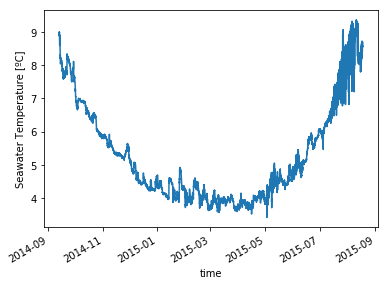

In [14]:
ds['ctdmo_seawater_temperature'].plot();

We can also quickly make a histogram.

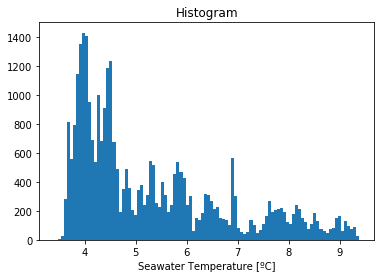

In [15]:
ds['ctdmo_seawater_temperature'].plot.hist(bins=100);

And we can plot a bunch of variables at once.  

To do this, we also need to load the matplotlib library directly (even though it's already included in xarray) so we can create subplots.

In [0]:
import matplotlib.pyplot as plt

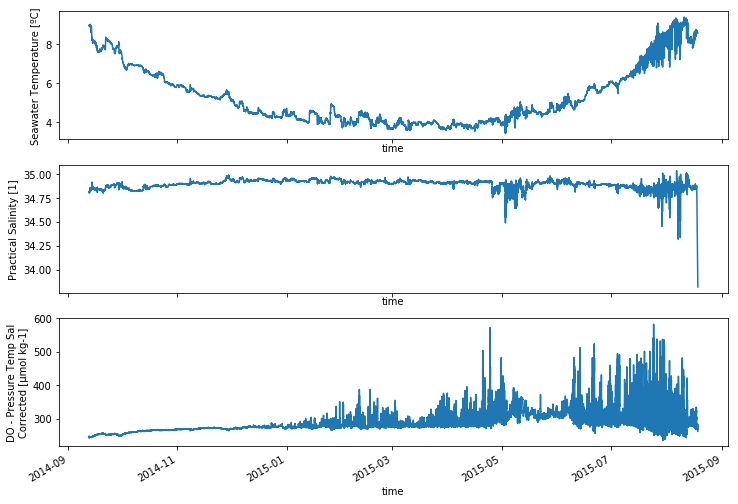

In [17]:
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(12,8))
ds['ctdmo_seawater_temperature'].plot(ax=ax1)
ds['practical_salinity'].plot(ax=ax2)
ds['dissolved_oxygen'].plot(ax=ax3);

Let's try it again using dots instead of lines.  We'll also add pressure.

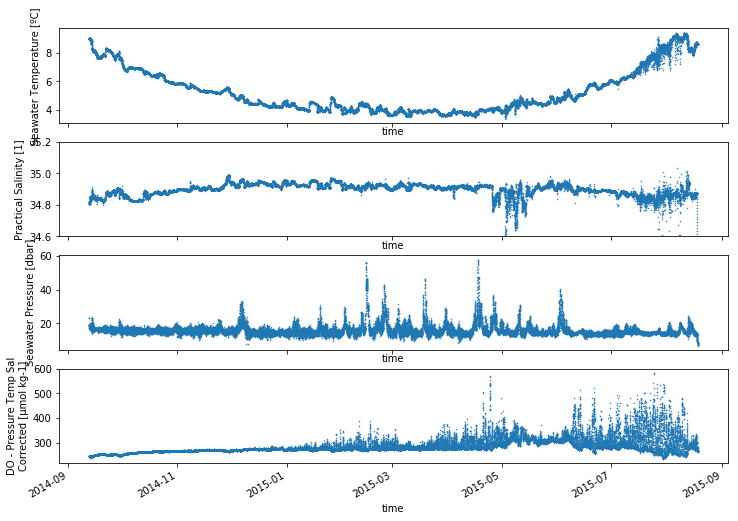

In [18]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, sharex=True, figsize=(12,8))
ds['ctdmo_seawater_temperature'].plot(ax=ax1,linestyle='None',marker='.',markersize=1)
ds['practical_salinity'].plot(ax=ax2,linestyle='None',marker='.',markersize=1)
ds['int_ctd_pressure'].plot(ax=ax3,linestyle='None',marker='.',markersize=1);
ds['dissolved_oxygen'].plot(ax=ax4,linestyle='None',marker='.',markersize=1);

# Let's change the salinity y-limits to account for outliners
ax2.set_ylim(34.6,35.2);

Note, that the average pressure is just shy of 20m, but this instrument was supposed to be at 30m.  So what's up?  It turns out, for this deployment, the mooring was deployed 10-15m shallower that planned.  In this case, 30m was the *design depth,* but it's always a good idea to check the actual pressure measurements when possible.

### And now let's make a TS plot

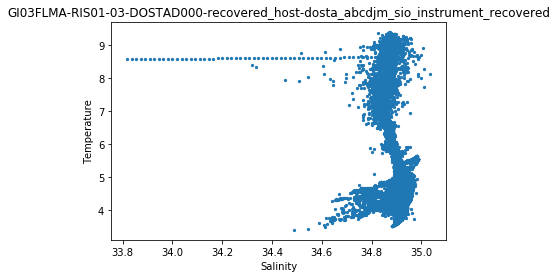

In [19]:
plt.scatter(ds.practical_salinity,ds.ctdmo_seawater_temperature,s=5)
plt.xlabel('Salinity')
plt.ylabel('Temperature')

# Add a quick title from the metadata
plt.title(ds.source);

### Subsetting the dataset
So from the figure above, we noticed some spurious data.  My guess is that the line of data heading off to the left is from when the instrument was recovered.  Let's subset the data so we can remove that line, and additionally focus in on a narrower time period.

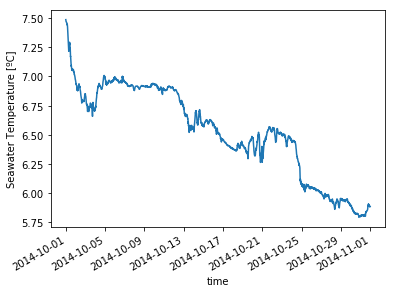

In [20]:
ds2 = ds.loc[dict(time=slice('2014-10-01', '2014-10-31'))]

ds2.ctdmo_seawater_temperature.plot();

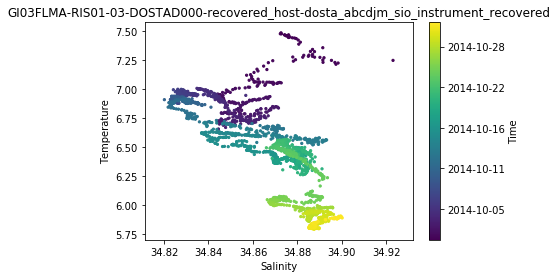

In [21]:
plt.scatter(ds2.practical_salinity,ds2.ctdmo_seawater_temperature,s=5,c=ds2.time, cmap='viridis')
plt.xlabel('Salinity')
plt.ylabel('Temperature')

# Quick title from the file
plt.title(ds.source); 

# Add a colorbar
cbar = plt.colorbar(label='Time');

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

## 6. Basic Statistics and Analysis

For many of these snippets, we will need to import the pandas library, if we haven't already.

In [0]:
import pandas as pd

### Identifying the Sampling Frequency

We can use the following snippet of code to find out the typical sampling frequency of the dataset. Note, this may take a while to calculate.

In [23]:
df = ds.to_dataframe()
res = (pd.Series(df.index[1:]) - pd.Series(df.index[:-1])).value_counts()
res

00:15:00    30045
00:15:01     1278
00:14:59     1278
Name: time, dtype: int64

### Some quick statistics

We can convert the xarray Dataset into a pandas Dataframe to do some quick statistical calculations.

In [24]:
df = ds[['ctdmo_seawater_temperature','practical_salinity','dissolved_oxygen']].to_dataframe()
df = df.drop(columns=['obs','lon','lat']) #Drop unnecessary columns
df.head()

,ctdmo_seawater_temperature,practical_salinity,dissolved_oxygen,int_ctd_pressure
time,,,,
2014-09-12 20:15:01,8.9442,34.804008,247.248944,23.462460
2014-09-12 20:30:01,8.9442,34.804008,241.812675,23.462460
2014-09-12 20:45:01,8.9442,34.804008,245.634307,23.462460
2014-09-12 21:00:01,8.9641,34.813397,245.819714,19.198884
2014-09-12 21:15:01,8.9669,34.815390,245.455993,19.163354


In [25]:
# Prepare to be blown away...
df.describe()

,ctdmo_seawater_temperature,practical_salinity,dissolved_oxygen,int_ctd_pressure
count,32602.000000,32602.000000,32602.000000,32602.000000
mean,5.302638,34.896432,288.198456,16.099682
std,1.485534,0.047556,33.311385,3.605048
min,3.411300,33.818704,234.574134,6.913503
25%,4.088225,34.876378,270.581732,14.242476
50%,4.683750,34.904589,276.380116,15.290606
75%,6.159250,34.923763,300.009837,16.782857
max,9.374200,35.035063,581.756776,57.837544


### Downsampling and Averaging
We can also easily calculate hourly, daily and monthly averages. See the [pandas.resample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html) doc for more, as well as this list of [offset options](http://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases).

That said, if you want to use centered averaging, moving averages, or other more complicated averaging or filtering routines using irregular intervals, you might have to roll-your-own code.

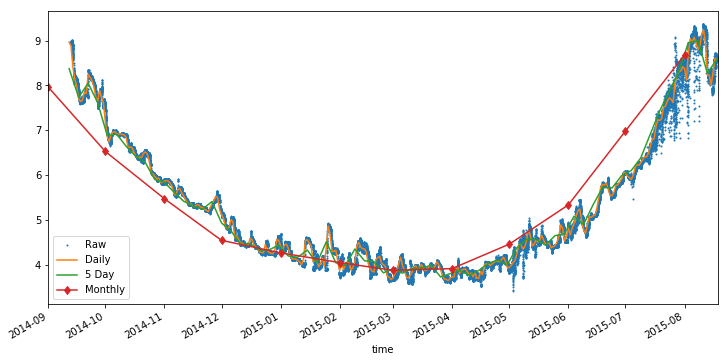

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
df['ctdmo_seawater_temperature'].plot(ax=ax,label='Raw',linestyle='None',marker='.',markersize=2)
df['ctdmo_seawater_temperature'].resample('D').mean().plot(ax=ax,label='Daily')
df['ctdmo_seawater_temperature'].resample('5D').mean().plot(ax=ax,label='5 Day')
df['ctdmo_seawater_temperature'].resample('MS').mean().plot(ax=ax,label='Monthly',marker='d') #MS=Month Start
plt.legend();

## Appendix 1: Equilibrium DO
In the Jigsaw activity, we actually compared the measured DO with the equilibrium DO, which is the amount of DO that would be in seawater if it was in equilibrium with the atmosphere.  Any deviation from that is likely due to biological or chemical processes, including respiration or photosynthesis.

We can easily calculate this value using the [gsw_O2sol](http://www.teos-10.org/pubs/gsw/html/gsw_O2sol.html) function in the Gibbs Seawater Toolbox.

In [27]:
!pip install gsw
import gsw

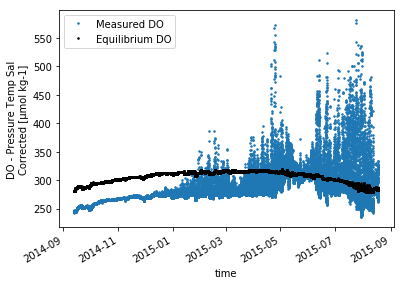

In [28]:
eo = gsw.O2sol_SP_pt(ds.practical_salinity,ds.ctdmo_seawater_temperature)
ds['dissolved_oxygen'].plot(label='Measured DO',marker='.',markersize=3,linestyle='')
plt.plot(ds.time,eo,'k.',label='Equilibrium DO',markersize=3)
plt.legend();

## Appendix 2: There's more to the DO saga
In the Jigsaw activity, we used the data shown in [The North Atlantic Biological Pump: Insights from the OOI Irminger Sea Array](https://tos.org/oceanography/article/the-north-atlantic-biological-pump-insights-from-the-ocean-observatories-in) by Palevsky and Nicholson.  Hillary was kind enough to share her dataset so we could make the activity.  But if you read the paper (and its supplement), you'll see that the authors actually did a lot of work to clean up the dataset, including:
* Omitting daylight hours when phytoplankton may be over-saturating the water column
* Omitting times when the mixed-layer was above the instrument
* Calibrating the initial data with the ship board samples
* Correcting drift over time, by comparing the surface instruments with profiling ones, using the assumption that DO at 2000m should remain constant over time.
* Removing spikes and other outliers, and more.

It's important to note, that while the OOI makes a lot of data available, it's essentially a research dataset, and an early one at that.  Thus, the data may not yet be research-ready.  Because the OOI is still young, some of the more complicated datasets (like DO) will require additional efforts by the community to resolve issues in how the measurements are made and calibrated.

As an example, let's try to fix the initial offset in the data, by aligning it to the ship-based DO Winkler titration.

To do this, we will calculate a correction factor, based on the average temperature, salinity, density and measured DO for the date of the ship measurement.  We can find the appropriate depth to pressure value from [this calculator](http://www.calctool.org/CALC/other/games/depth_press).

In [29]:
# Correction factor
t = ds.ctdmo_seawater_temperature.sel(time=slice('2014-10-17','2014-10-17')).mean()
s = ds.practical_salinity.sel(time=slice('2014-10-17','2014-10-17')).mean()
d = gsw.rho(s,t,26.2154) # Pressure at 16m depth = 26.2154 dbar

# Now we convert the measured Oxygen
bottle_val = 6.653 # in mL/L from GI Deployment 1 Cruise Cast #9
# Converstion 1 mL/L = 103/22.391 = 44.661 μmol/L
cast_do = bottle_val*44.661*1000/d # in μmol/kg

measured_do = ds.dissolved_oxygen.sel(time=slice('2014-10-17','2014-10-17')).mean()
measured_do.load()

do_correction = measured_do - cast_do
do_correction

<xarray.DataArray 'dissolved_oxygen' ()>
array(-24.820136)

In [0]:
# Add corrected DO
ds['dissolved_oxygen_corrected'] = ds.dissolved_oxygen - (do_correction)

(240, 400)

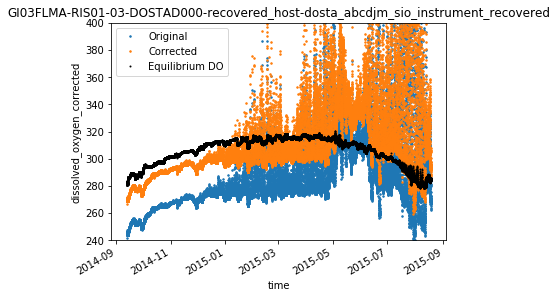

In [31]:
# Now let's plot the data

# ds.dissolved_oxygen.sel(time=slice('2014-09-17')).plot(label='Original');
# ds.dissolved_oxygen_corrected.sel(time=slice('2014-09-17')).plot(label='Corrected');

ds.dissolved_oxygen.plot(label='Original',marker='.',markersize=3,linestyle='');
ds.dissolved_oxygen_corrected.plot(label='Corrected',marker='.',markersize=3,linestyle='');

# And we'll include the Equilibrim Line as well
plt.plot(ds.time,eo,'k.',label='Equilibrium DO',markersize=2)

plt.legend();

plt.title(ds.source);
plt.ylim([240,400])

## Appendix 3: Adding Contours to a TS Diagram
While we created a TS diagram above, let's now add the density contours, as demonstrated by the [Ocean Python T-S Diagram](https://oceanpython.org/2013/02/17/t-s-diagram/) example, though we will use meshgrid instead.

To calculate density, we will need the wonderful [seawater](https://pythonhosted.org/seawater/index.html) library.

In [32]:
!pip install seawater
import seawater
import numpy as np

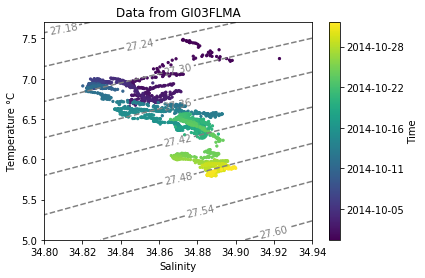

In [33]:
# TS Diagram with density contours
x = np.arange(34.8, 34.94, .01)
y = np.arange(5, 7.75, .05)
X, Y = np.meshgrid(x, y)

Z = seawater.eos80.dens0(X,Y) - 1000 # Substract 1000 to convert to sigma-t

# Plot the contour lines
CS = plt.contour(X, Y, Z, colors='grey', linestyles='dashed')
plt.clabel(CS, inline=1, fontsize=10, fmt='%0.2f')

# Plot the data
plt.scatter(ds2.practical_salinity,ds2.ctdmo_seawater_temperature,s=5,c=ds2.time, cmap='viridis')
plt.xlabel('Salinity')
plt.ylabel('Temperature °C')
plt.title('Data from %s' % ds2.subsite);

# Add a colorbar
cbar = plt.colorbar(label='Time');

# Fix the colorbar ticks
import pandas as pd # We need pandas for this
cbar.ax.set_yticklabels(pd.to_datetime(cbar.get_ticks()).strftime(date_format='%Y-%m-%d'));

## Appendix 4: Seaborn Pair Plot
The seaborn library provides a number of cool features.  One is the ability to quickly make a pair plot or scatterplot matrix.

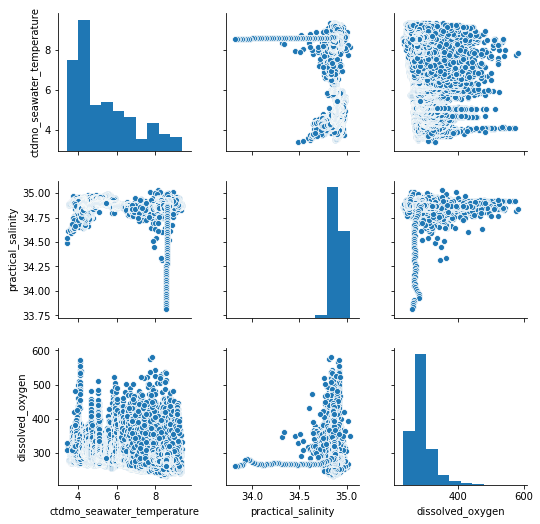

In [34]:
import seaborn as sns
sns.pairplot(df[['ctdmo_seawater_temperature','practical_salinity','dissolved_oxygen']]);

## Appendix 5: Loading and concatenating multiple files

We can also concatenate multiple .nc files using xarray.  For this, we will need a few more libraries.

In [0]:
import requests
import os
import re
import pandas as pd

First we need to build up a list of all of the files we wish to include. To start, let's specify the THREDDS url which contains all of our data files.  This is the link you received in your email.

In [0]:
url = 'https://opendap.oceanobservatories.org/thredds/catalog/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/catalog.html'

Next, we can use the following code to automatically find all of the available .nc files in the directory.

In [37]:
tds_url = 'https://opendap.oceanobservatories.org/thredds/dodsC'
datasets = requests.get(url).text
urls = re.findall(r'href=[\'"]?([^\'" >]+)', datasets)
x = re.findall(r'(ooi/.*?.nc)', datasets)
for i in x:
    if i.endswith('.nc') == False:
        x.remove(i)
for i in x:
    try:
        float(i[-4])
    except:
        x.remove(i)
datasets = [os.path.join(tds_url, i) for i in x]
datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20170808T160001-20180131T054501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GI03FLMA-RIM01-02-CTDMOG040-recovered_host-ctdmo_ghqr_sio_mule_instrument_20170808T200001-20180131T054501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160712T160001-20160830T060001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/2

Note, when requesting data from some instruments, you will actually get data files from multiple instruments, when they are needed to calculate derived parameters. When this happens, we need to modify the code above or tweak the resultant list to make sure you only include .nc files from the instrument you are interested in.

This snippet removes the CTD files from the list, so all we have are the DO files.

In [38]:
selected_datasets = []
for d in datasets:
  if 'CTD' in d:
    pass
  else:
    selected_datasets.append(d)
selected_datasets

['https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0004_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20170808T160001-20180131T054501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0003_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20160712T160001-20160830T060001.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-rutgers/20190307T155319-GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered/deployment0002_GI03FLMA-RIS01-03-DOSTAD000-recovered_host-dosta_abcdjm_sio_instrument_recovered_20150819T000001-20160418T201501.nc',
 'https://opendap.oceanobservatories.org/thredds/dodsC/ooi/sage-marine-ru

Now we can use open_mfdataset() to load all files into a single xarray dataset.  This may take a minute.


In [0]:
ds = xr.open_mfdataset(selected_datasets)
ds = ds.swap_dims({'obs': 'time'}) # Swap the primary dimension
ds = ds.chunk({'time': 100}) # Used for optimization
ds = ds.sortby('time') # Data from different deployments can overlap so we want to sort all data by time stamp.

In [40]:
# How big is this Dataset
ds.dissolved_oxygen.size

63891

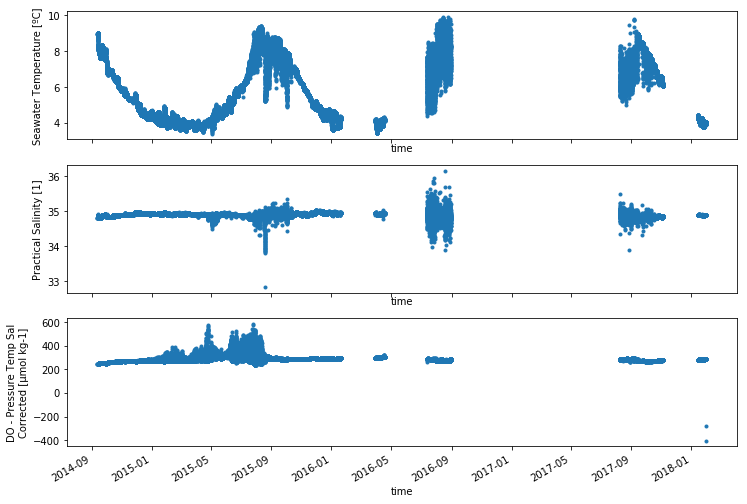

In [41]:
# Figure time
fig, (ax1,ax2,ax3) = plt.subplots(3,1, sharex=True, figsize=(12,8))
ds['ctdmo_seawater_temperature'].plot(ax=ax1,marker='.',linestyle='')
ds['practical_salinity'].plot(ax=ax2,marker='.',linestyle='')
ds['dissolved_oxygen'].plot(ax=ax3,marker='.',linestyle='');

# ax3.set_ylim(200,600);

## And even more fun

To continue the fun of playing with OOI data in python, I recommend checking out these other examples:

* [Plotting DO Profiles](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/Example_3_DO_Profiles.ipynb) - Includes more examples on subsetting data and changing colormaps.
* [Multi-instrument Quick Plots](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/extras1/Multi_instrument_Quick_Plots.ipynb)
* [Plotting Profiler Data in Real-Time](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/extras1/Realtime_Plotting.ipynb)
* [Working with ADCP Data](https://github.com/ooi-data-review/2018-data-workshops/blob/master/chemistry/examples/extras1/Working_with_ADCP_Data.ipynb)
* And [several others](https://github.com/ooi-data-review/2018-data-workshops/tree/master/chemistry/examples)

I'm also working on a number of new examples for the [Ocean Data Labs blog](https://datalab.marine.rutgers.edu/blog/).  Here are the first few...
* [Comparison of Air and Seawater Temperatures](https://github.com/ooi-data-lab/blog-notebooks/blob/master/201901/Air%20and%20Sea%20Temps.ipynb)
* [Some Basic Statistics of CTD Data](https://github.com/ooi-data-lab/blog-notebooks/blob/master/201901/Statistics.ipynb)
* [Temperature Correlations](https://github.com/ooi-data-lab/blog-notebooks/blob/master/201902/Temperature%20Correlations.ipynb)
